In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train), (X_test,y_test)= datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
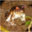

In [6]:
X_train[0]

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test=y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
def plot_sample(X,y,index):
  plt.figure(figsize=(10,1))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

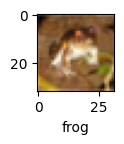

In [18]:
plot_sample(X_train,y_train,0)

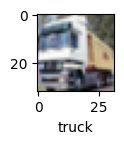

In [19]:
plot_sample(X_train,y_train,1)

In [20]:
X_train=X_train/255
X_test=X_test/255

In [22]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [25]:
cnn.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 34ms/step - accuracy: 0.3725 - loss: 1.7298
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.5535 - loss: 1.2537
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.6108 - loss: 1.1132
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.6430 - loss: 1.0262
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 30ms/step - accuracy: 0.6679 - loss: 0.9514
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.6846 - loss: 0.9022
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.6963 - loss: 0.8733
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.7087 - loss: 0.8390
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.7171 - loss: 0.8128
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.7277 - loss: 0.7838
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.7349 - loss: 0.7611
Epoch 12

In [26]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6775 - loss: 0.9814


[0.9876435399055481, 0.6759999990463257]

In [27]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[1.8511950e-05, 4.8906653e-04, 1.6384592e-03, 5.9920406e-01,
        9.5438369e-04, 3.9235714e-01, 9.0484571e-04, 7.3389587e-04,
        3.4440318e-03, 2.5554458e-04],
       [1.2341076e-04, 2.9572439e-03, 2.4248109e-06, 3.6187337e-06,
        4.7648442e-08, 4.6029069e-09, 7.6181514e-08, 1.1137914e-08,
        9.9659276e-01, 3.2031664e-04],
       [2.9030949e-02, 7.5875327e-02, 1.2470888e-02, 1.0081248e-02,
        9.1288233e-04, 9.7966369e-04, 3.5246409e-04, 1.8076295e-03,
        7.6768446e-01, 1.0080440e-01],
       [8.5400450e-01, 1.1323992e-02, 1.7366318e-02, 2.2551266e-03,
        3.0144339e-03, 3.7032300e-05, 3.0142872e-04, 3.7233834e-04,
        1.0671916e-01, 4.6056136e-03],
       [5.3523936e-06, 5.5938355e-05, 1.9014032e-01, 8.3956234e-02,
        8.4600128e-02, 5.9973206e-02, 5.8113682e-01, 9.7074171e-06,
        1.1747539e-04, 4.8950878e-06]], dtype=float32)

In [28]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

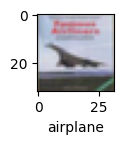

In [30]:
plot_sample(X_test,y_test,3)

In [31]:
classes[y_classes[3]]

'airplane'